In [1]:
import sys
sys.path.append("../")

from smc.sampler import SMCsampler
from smc.prior import CatalogPrior
from smc.images import ImageAttributes

import torch
# torch.cuda.is_available()
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
torch.set_default_device(device)

import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
num_images = 1
img_dim = 16 # Needs to be square for now
img_width = img_dim
img_height = img_dim
max_objects = 8
psf_stdev = 3.25
background_intensity = 19200

prior = CatalogPrior(max_objects = max_objects,
                     img_height = img_height,
                     img_width = img_width,
                     min_flux = background_intensity/3.)

image_attributes = ImageAttributes(img_height = img_height,
                                   img_width = img_width,
                                   max_objects = max_objects,
                                   psf_stdev = psf_stdev,
                                   background_intensity = background_intensity)

true_counts, true_fluxes, true_locs, true_total_intensities, images = image_attributes.generate(prior, num_images)

In [3]:
for i in range(num_images):
    print(f"image {i+1}",
          "\ncount\n", true_counts[i].round().item(),
          "\ntotal flux\n", true_fluxes[i].sum().item(),
          "\nloc\n", true_locs[i].cpu().numpy(), "\n\n")

image 1 
count
 4 
total flux
 274280.09375 
loc
 [[ 3.8474562  8.905297 ]
 [12.627814   6.961519 ]
 [13.117119  10.861321 ]
 [ 4.8680634 13.167611 ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [ 0.         0.       ]] 




True count: 4
True total flux: 274280.09375
Starting the sampler...
iteration 5, temperature = 0.0018517071148380637, posterior mean count = 3.9783730506896973
iteration 10, temperature = 0.005764983594417572, posterior mean count = 4.096364974975586
iteration 15, temperature = 0.015832537785172462, posterior mean count = 4.142011642456055
iteration 20, temperature = 0.04672975093126297, posterior mean count = 4.138359069824219
iteration 25, temperature = 0.1330578476190567, posterior mean count = 4.100290298461914
iteration 30, temperature = 0.3188372254371643, posterior mean count = 4.061532020568848
iteration 35, temperature = 0.6472277045249939, posterior mean count = 4.037238121032715
Done!

summary
number of SMC iterations: 38
log normalizing constant: -2155.695068359375
posterior mean count: 4.016909599304199
posterior mean total flux: 270986.84375
argmax count: 4.0
argmax total flux: 272873.8125





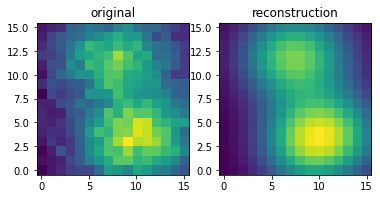

In [4]:
max_objects_smc = max_objects + 2
pad = 0
prior = CatalogPrior(max_objects_smc, img_width, img_height, background_intensity/3., pad)
smc = SMCsampler(images[0], image_attributes, prior,
                 max_objects = max_objects_smc, catalogs_per_block = 20000,
                 kernel_num_iters = 200,
                 max_smc_iters = 500,
                 wastefree = True, wastefree_M = 80)

print(f"True count: {true_counts[0]}")
print(f"True total flux: {true_fluxes[0].sum()}")

smc.run(print_progress = True)
smc.summarize()